In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np

In [7]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

In [8]:
X

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [9]:
y

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

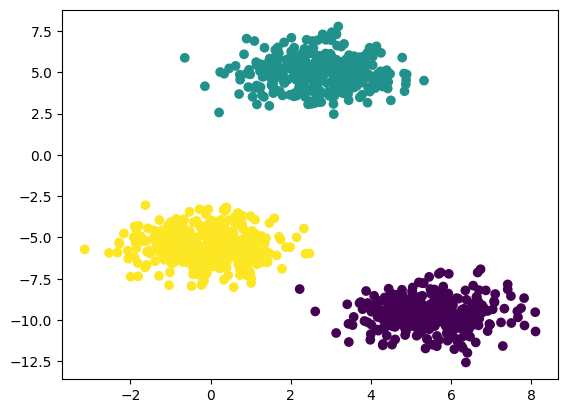

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

In [11]:
#Perform standardization - Feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [15]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [16]:
#Perform Elbow method to pick the K-Value
wcss = []
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [17]:
wcss #wcss value decreases when k value increases

[1399.9999999999989,
 597.5154129902319,
 123.36525447242308,
 100.07126032612118,
 77.10965029658684,
 55.68210047206704,
 48.99386626215579,
 42.73930751120938,
 36.61818427190396,
 33.87573436231263]

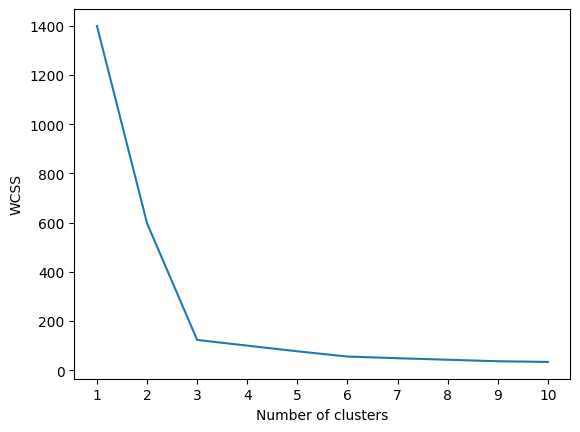

In [18]:
#plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
#K=3
kmeans=KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0,
       2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 1,
       2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 1, 0,
       1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 2,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 0, 2,
       2, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,

In [20]:
y_pred = kmeans.predict(X_test_scaled)

In [21]:
y_pred

array([2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1,
       1, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0], d

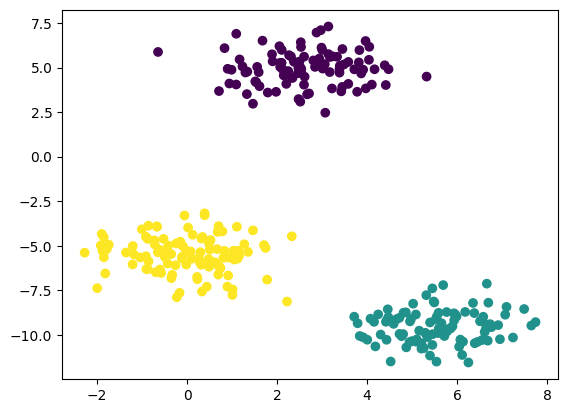

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [23]:
#Validating the K Value

#1.Knee locator
#2.Silhoutee scoring


In [24]:
#Knee locator
!pip install kneed

In [25]:
from kneed import KneeLocator

In [26]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [27]:
kl.elbow

3

In [28]:
# Silhoutee scoring
from sklearn.metrics import silhouette_score

In [29]:
silhoutte_coefficients = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhoutte_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [30]:
silhoutte_coefficients

[0.584192342088166,
 0.7591880471705307,
 0.6452308850276307,
 0.5508953922569965,
 0.4474029501544945,
 0.4302094976761943,
 0.41092800487705194,
 0.3869908834279886,
 0.3753610747438604]

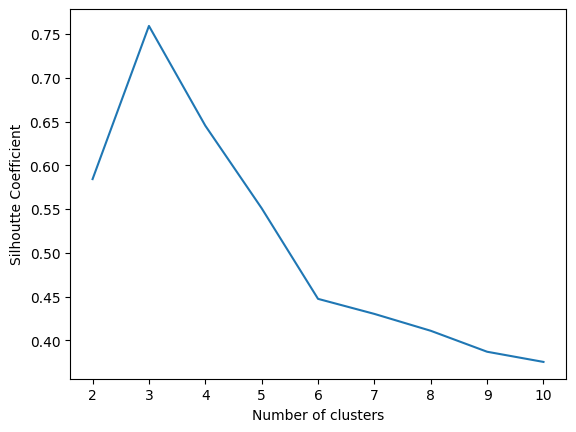

In [33]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.show()

In [ ]:
#here the At the k=3 the coeffient value is very high so we need to pick the k value as 3